In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sbn

In [3]:
housing_data = fetch_california_housing()

In [4]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [62]:
housing_df = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
housing_df['target'] = housing_data.target
print(housing_df.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [63]:
correl_data = housing_df.corr()


<AxesSubplot:>

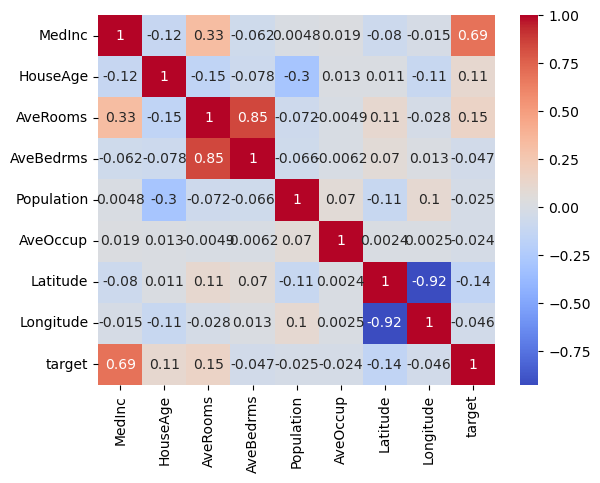

In [64]:
sbn.heatmap(correl_data, cmap='coolwarm', annot=True)

In [6]:
X = housing_data.data
Y = housing_data.target
print(X.shape, Y.shape)

(20640, 8) (20640,)


In [7]:
#Using tsne to visualize the 8 dimension data scatter in 2D

tsne_obj = TSNE(n_components=2, random_state=32)
tsne_data = tsne_obj.fit_transform(X)
print(tsne_data)

C:\Users\leich\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\leich\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[ 47.952026  15.879571]
 [-47.237236   7.921711]
 [  4.461431  26.795603]
 ...
 [-38.759495 -58.256516]
 [ 47.48104   38.40452 ]
 [-10.543394  48.54982 ]]


In [8]:
tsne_data.shape

(20640, 2)

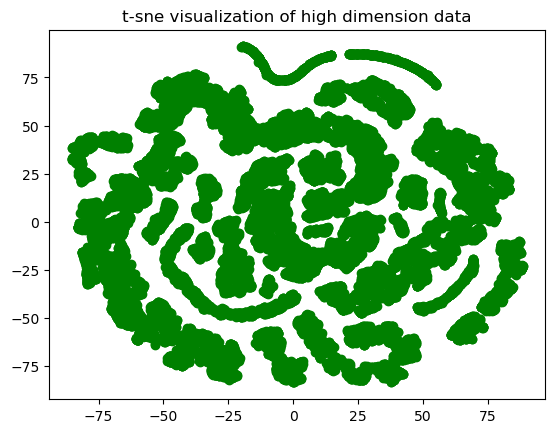

In [14]:
plt.scatter(tsne_data[:,0], tsne_data[:, 1], c='green')
plt.title("t-sne visualization of high dimension data")
plt.show()

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)
print(f"Training data: {X_train.shape}, {Y_train.shape}")
print(f"Testing data: {X_test.shape}, {Y_test.shape}")

Training data: (16512, 8), (16512,)
Testing data: (4128, 8), (4128,)


In [50]:
# weight initialize
W = np.random.randn(X_train.shape[1])
b = 0.23

In [54]:
X_train

array([[   1.75      ,   49.        ,    5.55263158, ...,    3.68421053,
          37.81      , -122.29      ],
       [   2.1542    ,   17.        ,    7.04504505, ...,    2.32882883,
          41.01      , -123.52      ],
       [   2.3958    ,   14.        ,    7.91111111, ...,    3.        ,
          40.76      , -122.89      ],
       ...,
       [   3.934     ,   18.        ,    5.26815642, ...,    3.03910615,
          37.03      , -121.79      ],
       [   1.8375    ,   21.        ,    5.37267081, ...,    3.04968944,
          39.86      , -122.23      ],
       [   3.6125    ,   36.        ,    4.96995708, ...,    2.65665236,
          32.73      , -117.08      ]])

In [52]:
W

array([-0.52504075, -2.04535769, -0.06902306, -0.48330897,  1.3352677 ,
       -0.84512329, -1.72695228, -0.51599737])

In [53]:
np.dot(X_train, W)

array([ 640.26829486,  644.13945473,  319.86481939, ...,  682.89080408,
       1258.07611342,  751.85051037])

In [57]:
gradient(X_train, Y_train, prediction(X_train, W, b))

(array([-1.42485297e+04, -9.34678257e+04, -1.94182802e+04, -3.93960065e+03,
        -8.45651850e+06, -1.36676321e+04, -1.30361801e+05,  4.39144210e+05]),
 -3677.603469918423)

In [24]:
# predicting output
def prediction(X, W, b):
    return np.dot(X, W) + b

In [30]:
# calculating loss
def loss_function(Y, Y_):
    return np.mean(np.square(Y-Y_))

In [55]:
# gradient calculation
def gradient(X, Y, Y_):
    return 2*np.dot(X.T,Y-Y_)/X.shape[0], 2*np.mean(Y-Y_)

In [48]:
epoc = 20
learning_rate = 0.01
for each in range(epoc):
    # predict output
    Y_ = prediction(X_train, W, b)
    # calculate loss
    loss = loss_function(Y_train, Y_)
    if each%1 == 0:
        print(f"Loss at epoc {each} is {loss}")
    # update weight 
    W_, b_ = gradient(X_train, Y_train, Y_)
    W = W - learning_rate*W_
    b = b - learning_rate*b

Loss at epoc 0 is 18713943.250803202
Loss at epoc 1 is 7.860243261875706e+16
Loss at epoc 2 is 3.3025320962953194e+26
Loss at epoc 3 is 1.3875802435488874e+36
Loss at epoc 4 is 5.830008236549837e+45
Loss at epoc 5 is 2.449515708821879e+55
Loss at epoc 6 is 1.0291798852270566e+65
Loss at epoc 7 is 4.3241659252939136e+74
Loss at epoc 8 is 1.816826311694571e+84
Loss at epoc 9 is 7.633513384760605e+93
Loss at epoc 10 is 3.207270074208118e+103
Loss at epoc 11 is 1.3475552881648062e+113
Loss at epoc 12 is 5.661840794961097e+122
Loss at epoc 13 is 2.3788590693849887e+132
Loss at epoc 14 is 9.994930406788476e+141
Loss at epoc 15 is 4.199434725755822e+151
Loss at epoc 16 is 1.7644196905969688e+161
Loss at epoc 17 is 7.413323572986321e+170
Loss at epoc 18 is 3.1147558991024693e+180
Loss at epoc 19 is 1.3086848584818287e+190
